# Supplemental Figure 2

- Panel A: Plate map of siRNA construct and concentration layout for Plate 4
- Panel B: Plate map of genotype layout for Plate 4

## Import libraries

In [1]:
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(ggplot2))
suppressPackageStartupMessages(library(grid))
suppressPackageStartupMessages(library(patchwork))
suppressPackageStartupMessages(library(platetools))

Warning message:
“package ‘ggplot2’ was built under R version 4.2.3”
Warning message:
“package ‘patchwork’ was built under R version 4.2.3”
Warning message:
“package ‘platetools’ was built under R version 4.2.3”


## Set paths

In [2]:
figure_dir <- "figures/supplementary"
output_supp_figure_2 <- file.path(figure_dir, "supp_figure_2_plate4_platemaps.png")

## Load in Plate 4 plate map file

In [3]:
url <- "https://raw.githubusercontent.com/WayScience/nf1_cellpainting_data/main/0.download_data/metadata/platemap_NF1_plate4.csv"
plate_4_df <- read.csv(url)

dim(plate_4_df)
head(plate_4_df)

[1] 60  9

,WellRow,WellCol,well_position,gene_name,genotype,seed_density,siRNA,RNAiMax,Concentration
,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<dbl>
1,B,2,B2,NF1,WT,1000,None,0,0.000
2,B,3,B3,NF1,WT,1000,Scramble,1,0.050
3,B,4,B4,NF1,WT,1000,Scramble,1,0.005
4,B,5,B5,NF1,WT,1000,None,0,0.000
5,B,6,B6,NF1,WT,1000,Scramble,1,0.005
6,B,7,B7,NF1,WT,1000,Scramble,1,0.050


## Generate plate map with construct and dose

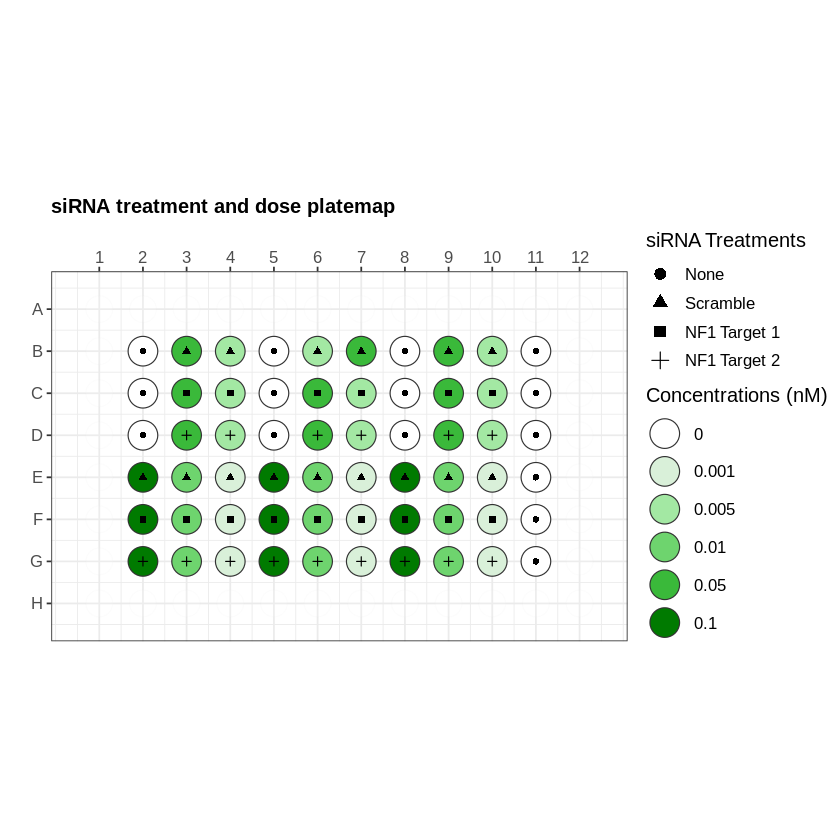

In [4]:
platemap_dose <- platetools::raw_map(
    data = as.character(plate_4_df$Concentration),
    well = plate_4_df$well_position,
    plate = 96,
    size = 8
) +
ggtitle(paste("siRNA treatment and dose platemap")) +
theme(plot.title = element_text(size = 12, face = "bold")) +
ggplot2::geom_point(aes(shape = plate_4_df$siRNA)) +
ggplot2::scale_shape_discrete(
    name = "siRNA Treatments",
    limits = c("None", "Scramble", "NF1 Target 1", "NF1 Target 2"),
    guide = guide_legend(override.aes = list(size = 3))  # Adjust size here
) +
ggplot2::scale_fill_manual(
    name = "Concentrations (nM)",
    values = c("#ffffff", "#d9f0d9", "#a3e8a3", "#6ed46e", "#3ab93a", "#007a00")
) +
theme(
    legend.text = element_text(size = 10),
    legend.title = element_text(size = 12),
    legend.position = "right",
    # move legend around so it fits better on the screen
    legend.margin = margin(-15, 0, 10, 0),
    legend.box = "vertical",
    axis.text.x = element_text(size = 10),  # Adjust x-axis tick size
    axis.text.y = element_text(size = 10)   # Adjust y-axis tick size
)

platemap_dose


## Generate plate map for genotype

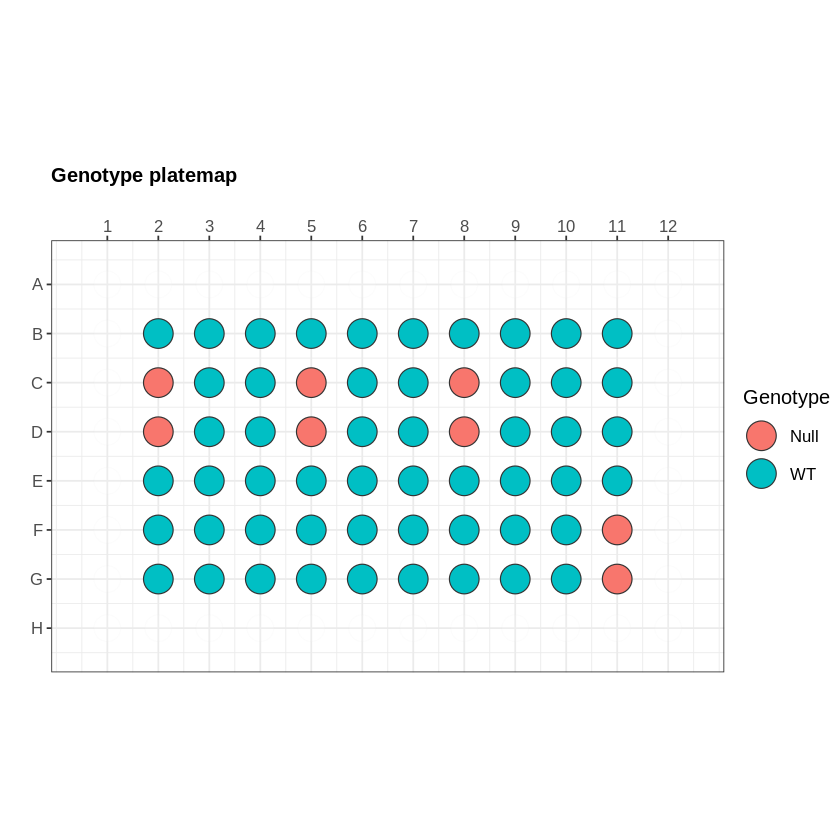

In [5]:
# Platemap for genotype
platemap_genotype <- platetools::raw_map(
    data = plate_4_df$genotype,
    well = plate_4_df$well_position,
    plate = 96,
    size = 8
) +
ggtitle(paste("Genotype platemap")) +
theme(plot.title = element_text(size = 12, face = "bold")) +
ggplot2::scale_fill_discrete(name = "Genotype") +
theme(
    legend.text = element_text(size = 10),
    legend.title = element_text(size = 12),
    legend.position = "right",
    # move legend around so it fits better on the screen
    legend.margin = margin(-10, 0, 10, 0),
    legend.box = "horizontal",
    axis.text.x = element_text(size = 10),  # Adjust x-axis tick size
    axis.text.y = element_text(size = 10)   # Adjust y-axis tick size
)

platemap_genotype


## Generate Supplemental Figure 2

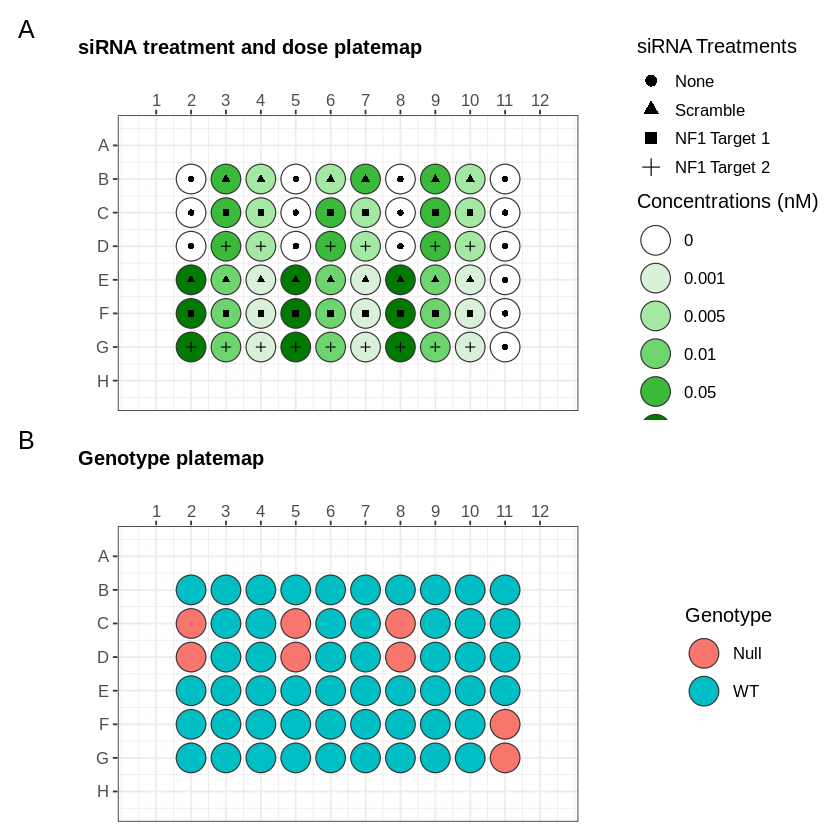

In [6]:
align_plot_gg <- (
    platemap_dose /
    platemap_genotype
) + plot_layout(heights = c(1, 1))

supp_fig_2_gg <- (
  align_plot_gg
) + plot_annotation(tag_levels = "A") & theme(plot.tag = element_text(size = 15))

# Save or display the plot
ggsave(output_supp_figure_2, dpi = 500, height = 8, width = 8)

supp_fig_2_gg